# WINE NOT?

## Ironhack's Data Analytics Bootcamp FINAL PROJECT

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
red = pd.read_csv('../data/red.csv')
white = pd.read_csv('../data/white.csv')
sparkling = pd.read_csv('../data/sparkling.csv')
rose = pd.read_csv('../data/rose.csv')

### Merging datasets

In [3]:
red['WineStyle'] = 'red'
white['WineStyle'] = 'white'
sparkling['WineStyle'] = 'sparkling'
rose['WineStyle'] = 'rose'

wines =  pd.concat([red, white, sparkling, rose], ignore_index=True)

In [4]:
wines.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red


In [5]:
wines["Full_Name"] = wines["Name"] + " " + wines["Winery"] + " " + wines["WineStyle"]

In [6]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,WineStyle,Full_Name
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,red,Pomerol 2011 Château La Providence red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,red,Lirac 2017 Château Mont-Redon red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,red,Erta e China Rosso di Toscana 2015 Renzo Masi red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,red,Bardolino 2019 Cavalchina red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,red,Ried Scheibner Pinot Noir 2016 Markowitsch red
...,...,...,...,...,...,...,...,...,...,...
13829,Côte des Roses Rosé 2019,France,Languedoc,Gérard Bertrand,3.9,1750,9.36,2019,rose,Côte des Roses Rosé 2019 Gérard Bertrand rose
13830,M Rosé 2019,France,Côtes de Provence,Minuty,4.0,2046,12.85,2019,rose,M Rosé 2019 Minuty rose
13831,Whispering Angel Rosé 2019,France,Côtes de Provence,Château d'Esclans,4.2,2990,16.47,2019,rose,Whispering Angel Rosé 2019 Château d'Esclans rose
13832,Vinho Verde Rosé N.V.,Portugal,Vinho Verde,Casal Garcia,3.5,9493,4.35,N.V.,rose,Vinho Verde Rosé N.V. Casal Garcia rose


## Exploratory data analysis

In [7]:
wines.shape

(13834, 10)

In [8]:
wines.isnull().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
WineStyle          0
Full_Name          0
dtype: int64

In [9]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   WineStyle        13834 non-null  object 
 9   Full_Name        13834 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


### Converting ``Year``

In [10]:
wines["Year"].unique()

array(['2011', '2017', '2015', '2019', '2016', '2014', '2013', '2018',
       '2012', '2010', '2007', '2005', '1999', '2002', '2008', '2006',
       '2009', 'N.V.', '2000', '2004', '2001', '1996', '1998', '1990',
       '1995', '2003', '1993', '1988', '1989', '1997', '1992', '1991',
       '2020', '1961'], dtype=object)

- **N.V.** wines stand for **NonVintage** wines, which is usually a blend from the produce of two or more years
- We have to replace ``NV`` in order to be able to convert the variable from categorical to numerical
- Let's choose a year that is not in the dataset so we know that those wines are NV --> 2050 for instance

In [11]:
wines['Year'] = wines['Year'].replace('N.V.', 2050)

wines['Year'] = wines['Year'].astype('int')

In [12]:
wines["Year"].unique()

array([2011, 2017, 2015, 2019, 2016, 2014, 2013, 2018, 2012, 2010, 2007,
       2005, 1999, 2002, 2008, 2006, 2009, 2050, 2000, 2004, 2001, 1996,
       1998, 1990, 1995, 2003, 1993, 1988, 1989, 1997, 1992, 1991, 2020,
       1961])

In [13]:
year_count = wines["Year"].value_counts()
year_count

2018    2723
2017    2412
2016    2294
2015    1678
2014     905
2019     893
2050     744
2013     624
2012     423
2011     312
2010     192
2005     160
2008     101
2009      99
2006      64
2007      60
2004      34
2000      19
1999      19
2003      15
2001      12
2002      11
1998       7
1997       7
1996       6
1995       4
1961       3
1992       3
1990       2
1993       2
2020       2
1989       2
1991       1
1988       1
Name: Year, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


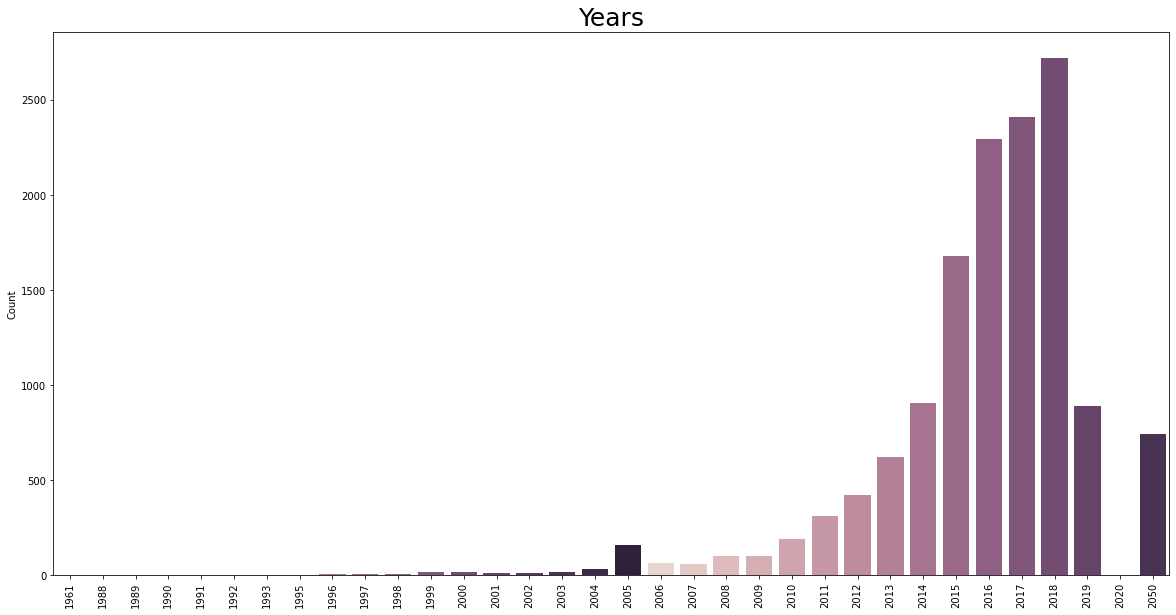

In [14]:
plt.figure(figsize=(20,10))

sns.barplot(year_count.index, year_count.values, palette=sns.cubehelix_palette(18))

plt.ylabel("Count")
plt.title("Years", fontsize=25);
plt.xticks(rotation=90);

#### Key Takeaway:
From this figure we can draw a few conclusions:
- The production of wine as exponentially increased over the years
- Nevertheless, the production decreased significantly in 2019 for unknown reasons
- In 2020 the production is very low. This can be due to obvious reasons (such as COVID-19) or because the data hasn't been recorded yet
- 2050 has we said before, gathers the information of all the Non-Vintage bottles, since we don't have the information of their year of production

### ``Country``

In [15]:
country_count = wines["Country"].value_counts()
country_count

Italy             3919
France            3436
Spain             1533
Germany           1229
South Africa       846
United States      530
Austria            492
Chile              431
Portugal           336
Australia          318
Argentina          308
New Zealand        165
Brazil              50
Romania             37
Greece              25
Switzerland         23
Israel              23
Hungary             19
Slovenia            18
Moldova             16
Lebanon             16
Luxembourg          14
Georgia             13
Turkey              10
Croatia              6
Uruguay              5
United Kingdom       3
China                3
Canada               3
Czech Republic       2
Bulgaria             2
Slovakia             2
Mexico               1
Name: Country, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


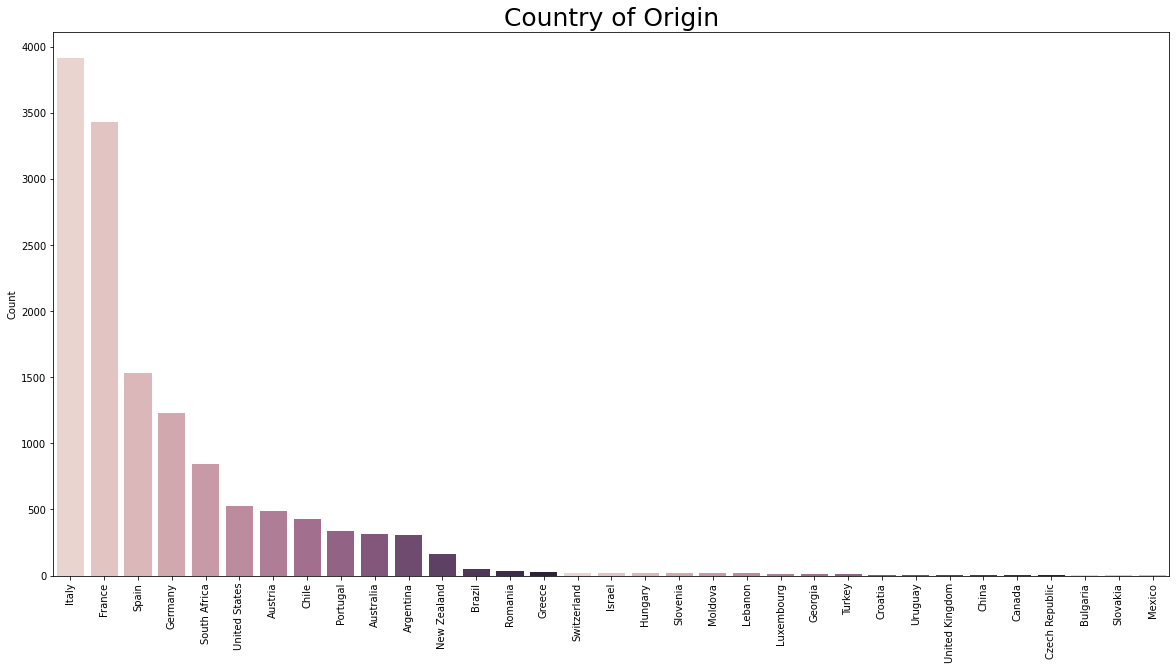

In [16]:
plt.figure(figsize=(20,10))

sns.barplot(country_count.index, country_count.values, palette=sns.cubehelix_palette(15))

plt.ylabel("Count")
plt.title("Country of Origin", fontsize=25);
plt.xticks(rotation=90);

#### Key Takeaway:
- In this figure we can see the distribution of all the countries that produce wine
- There are wines from 33 countries

### Let's take a closer look into the top 10 countries with the largest export volume:

In [17]:
top10 = wines["Country"].value_counts().head(10)
top10

Italy            3919
France           3436
Spain            1533
Germany          1229
South Africa      846
United States     530
Austria           492
Chile             431
Portugal          336
Australia         318
Name: Country, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


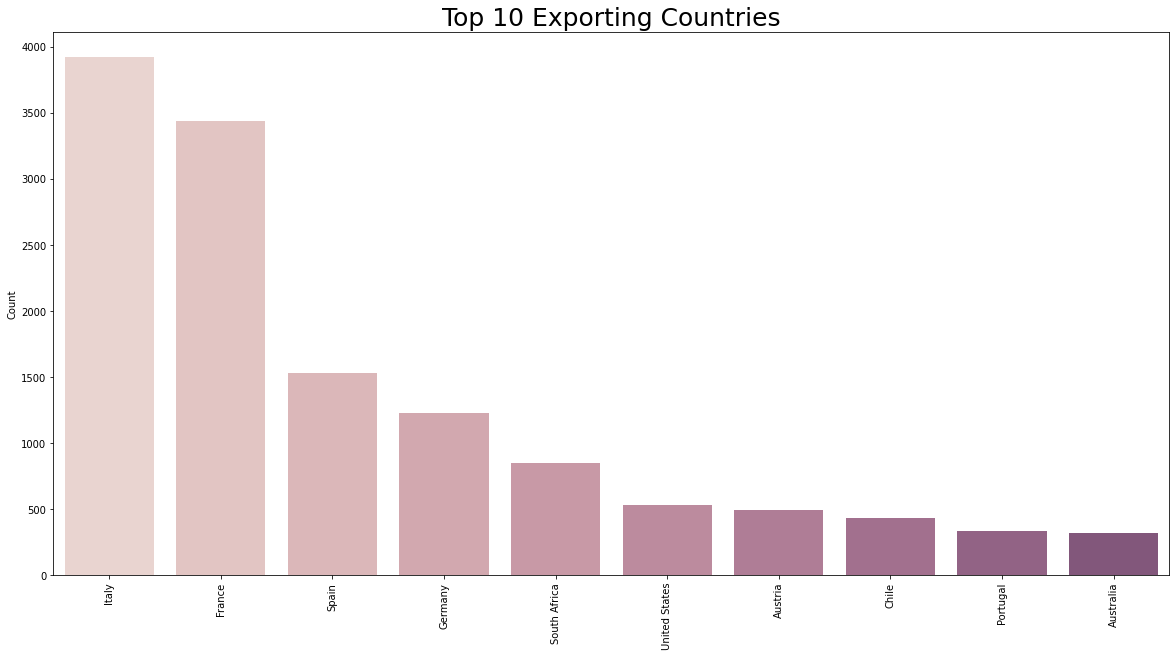

In [18]:
plt.figure(figsize=(20,10))

sns.barplot(top10.index, top10.values, palette=sns.cubehelix_palette(15))

plt.ylabel("Count")
plt.title("Top 10 Exporting Countries", fontsize=25);
plt.xticks(rotation=90);

#### Key Takeaway:
From the bottles of our dataset, the top 3 countries that export most wine are:
- **Italy** with almost 4,000 bottles
- **France** with almost 3,500 bottles
- **Spain** with around 1,500 bottles

### Exporting dataset

In [19]:
wines.to_csv("../data/wines_clean.csv")

### ``Rating``

In [20]:
wines["Rating"].value_counts().sort_values(ascending=False)

3.8    2065
3.9    1792
3.7    1663
4.0    1418
3.6    1347
4.1    1339
4.2    1034
3.5     824
4.3     620
3.4     469
4.4     364
3.3     281
4.5     202
3.2     142
4.6     130
3.1      48
3.0      32
4.7      31
4.8       8
2.9       8
2.8       8
2.7       3
2.6       2
2.5       2
2.2       1
4.9       1
Name: Rating, dtype: int64

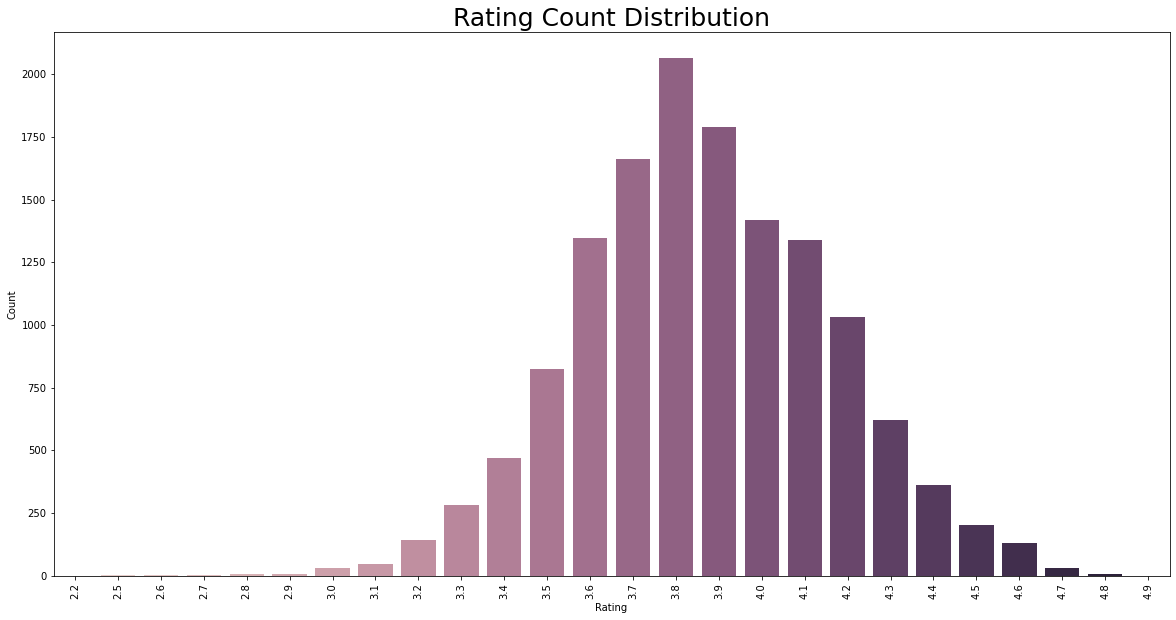

In [21]:
plt.figure(figsize=(20,10))

sns.countplot(x='Rating', data=wines, palette=sns.cubehelix_palette(25))

plt.ylabel("Count", fontsize=10)
plt.title("Rating Count Distribution", fontsize=25);
plt.xticks(rotation=90);

#### Key Takeaway:
- We can see that the variable ``Rating`` follows a normal distribution
- The rating given more times is **3.8**

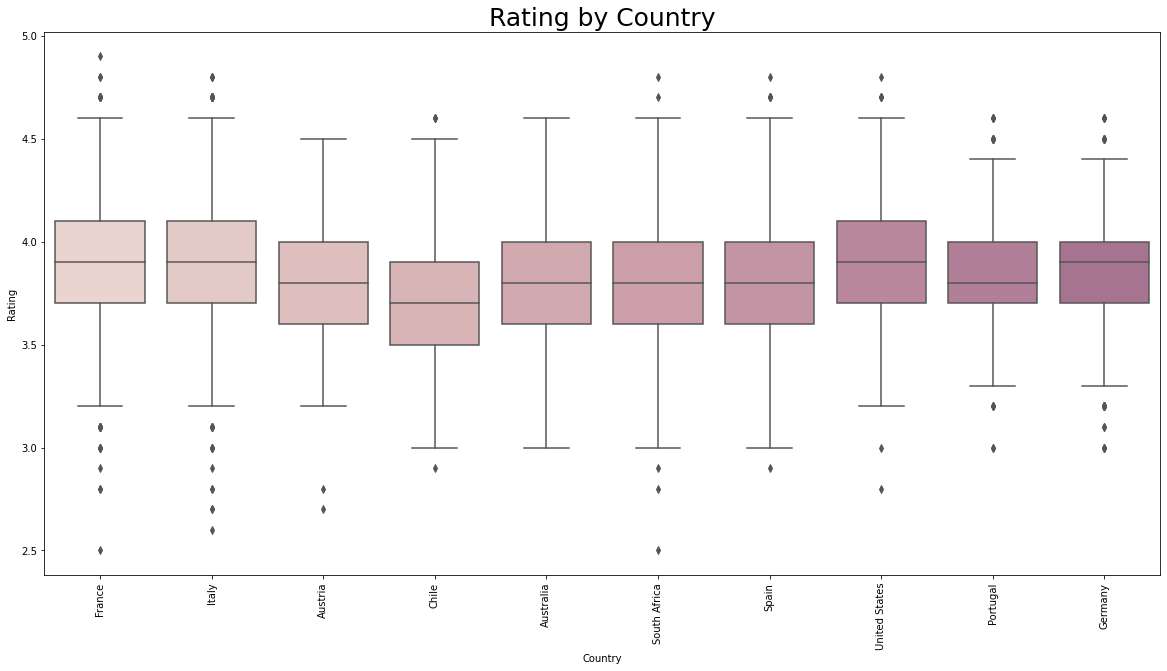

In [22]:
plt.figure(figsize=(20,10))

sns.boxplot(x='Country', y='Rating', data=wines[wines.Country.isin(top10.index.values)], palette=sns.cubehelix_palette(20))

plt.ylabel("Rating", fontsize=10)
plt.title("Rating by Country", fontsize=25);
plt.xticks(rotation=90);

#### Key Takeaway:
- The country with the *lowest* median is **Chile**
- The countries with the *highest* median are **France**, **Italy** and the **United States**

### ``Region``

#### Let's find the top 100 regions and wineries which produce the most bottles and have the highest average rating

Top 100 Regions

In [23]:
wines['Region'].value_counts()[:100]

Rioja                     385
Stellenbosch              337
Pfalz                     331
Toscana                   307
Champagne                 263
                         ... 
Hermitage                  36
Südsteiermark              35
Vigneti delle Dolomiti     35
Vin de France              34
Somontano                  34
Name: Region, Length: 100, dtype: int64

Top 20 Regions by Rating

In [24]:
top100_r = wines['Region'].value_counts()[:100].index
print(wines[wines['Region'].isin(top100_r)].groupby('Region').Rating.mean().sort_values(ascending=False)[:20])

Region
Brunello di Montalcino                 4.253571
Amarone della Valpolicella Classico    4.242222
Hermitage                              4.236111
Pauillac                               4.222581
Saint-Julien                           4.188182
Amarone della Valpolicella             4.183784
Châteauneuf-du-Pape                    4.171000
Pessac-Léognan                         4.132955
Napa Valley                            4.131034
Primitivo di Manduria                  4.114516
Pomerol                                4.111864
Barolo                                 4.111429
Priorat                                4.105263
Champagne                              4.102281
Margaux                                4.083486
Saint-Émilion Grand Cru                4.079710
Gigondas                               4.062222
Barossa Valley                         4.031579
Saint-Estèphe                          4.026027
Ribera del Duero                       4.004217
Name: Rating, dtype: float64


Top 100 Wineries

In [25]:
wines['Winery'].value_counts()[:100]

Markus Molitor      73
Errazuriz           58
Torres              54
Joseph Drouhin      51
Gaja                42
                    ..
Boekenhoutskloof    17
Tormaresca          17
Domaine Bousquet    17
Robert Mondavi      17
Les Jamelles        17
Name: Winery, Length: 100, dtype: int64

Top 20 Wineries by Rating

In [26]:
top100_w = wines['Winery'].value_counts()[:100].index
print(wines[wines['Winery'].isin(top100_w)].groupby('Winery').Rating.mean().sort_values(ascending=False)[:20])

Winery
Gaja                          4.366667
Louis Roederer                4.344444
Château Léoville Las Cases    4.321053
Antinori                      4.163889
Vietti                        4.118182
Domaine de la Janasse         4.085714
Bellavista                    4.083333
Morgenster Estate             4.083333
Ceretto                       4.063158
Château de Saint Cosme        4.054545
Penfolds                      4.048387
Tardieu-Laurent               4.042857
San Marzano                   4.026087
Delas                         4.016667
M. Chapoutier                 4.011905
Markus Molitor                4.009589
Von Winning                   4.008824
E. Guigal                     3.994444
Robert Mondavi                3.988235
St. Michael-Eppan             3.988000
Name: Rating, dtype: float64


#### Key Takeaway:
- Any bottle from the list of the top 20 regions/wineries by rating will be worth a try in any given store

### ``Price``

In [27]:
price_count = wines['Price'].value_counts().sort_values(ascending=False).head(10)
price_count

9.9     119
9.5     107
8.9      90
11.9     83
14.9     80
12.9     78
7.9      76
15.9     75
10.9     75
19.9     74
Name: Price, dtype: int64

In [28]:
most_expensive = wines['Price'].max()
most_expensive

3410.79

In [29]:
cheapest = wines['Price'].min()
cheapest

3.15

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-30-3f43bc1c8807>:14: RuntimeWarning: overflow encountered in exp
  graph2.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))
<ipython-input-30-3f43bc1c8807>:14: UserWarning: FixedFormatter should onl

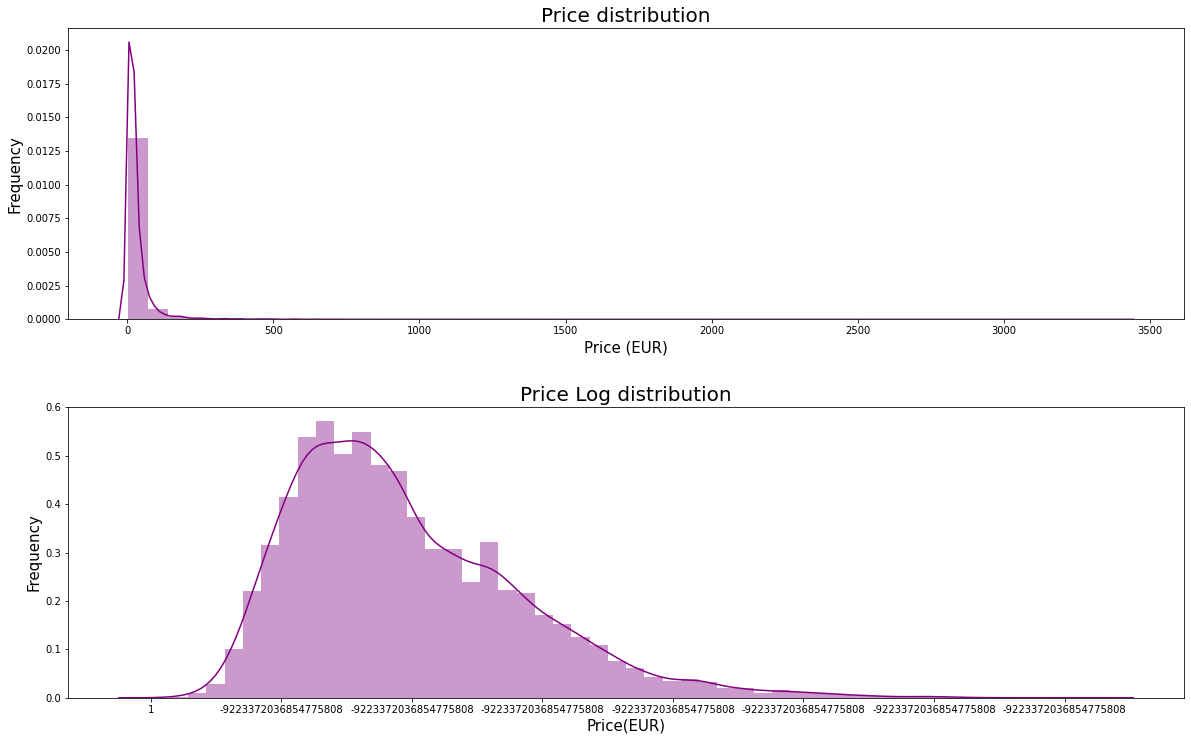

In [30]:
plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
graph1 = sns.distplot(wines['Price'], color='purple')
graph1.set_title("Price distribution", fontsize=20) # seting title and size of font
graph1.set_xlabel("Price (EUR)", fontsize=15) # seting xlabel and size of font
graph1.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font

plt.subplot(2,1,2)
graph2 = sns.distplot(np.log(wines['Price']) , color='purple')
graph2.set_title("Price Log distribution", fontsize=20) # seting title and size of font
graph2.set_xlabel("Price(EUR)", fontsize=15) # seting xlabel and size of font
graph2.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font
graph2.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

#### Key Takeaway:
- The most common price is around **9-10** EUR
- The most expensive wine costs **3410.79** EUR
- The cheapest wine costs **3.15** EUR
- The price dostribution shows an exponential relation with some quantities, that's why the logaritmic conversion. In the second graph we see that there is clearly a trend

#### Let's analyze the price by year, by winestyle and by country

<ipython-input-31-02be8d10906d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))
<ipython-input-31-02be8d10906d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))
<ipython-input-31-02be8d10906d>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph3.set_yticklabels(np.exp(graph3.get_yticks()).astype(int))


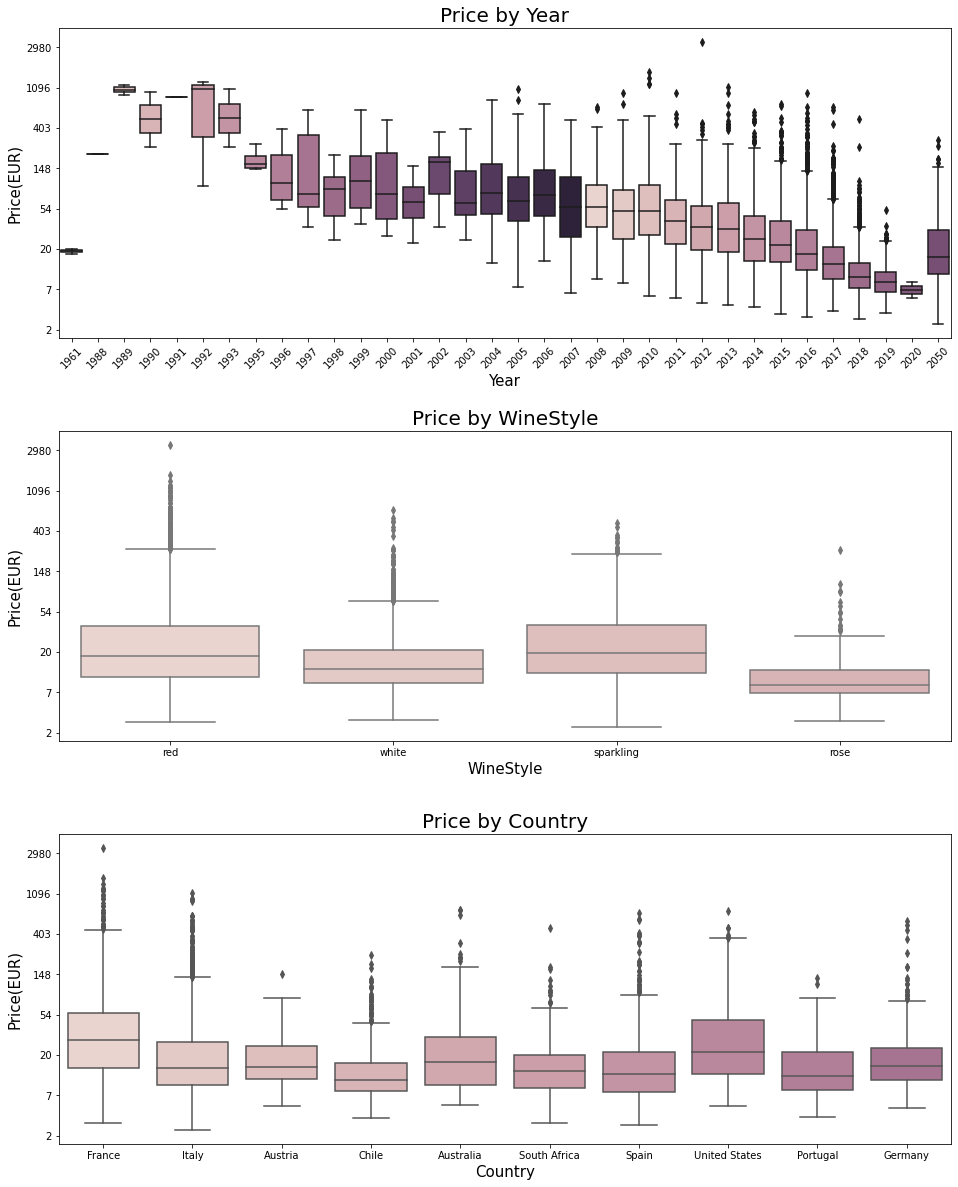

In [31]:
plt.figure(figsize=(16,20))

plt.subplot(3,1,1)
graph1 = sns.boxplot(x='Year', y=np.log(wines['Price']), data=wines, palette=sns.cubehelix_palette(20))
graph1.set_title("Price by Year", fontsize=20)
graph1.set_xlabel("Year", fontsize=15)
graph1.set_ylabel("Price(EUR)", fontsize=15)
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=45)
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))

plt.subplot(3,1,2)
graph2 = sns.boxplot(x='WineStyle', y=np.log(wines['Price']), data=wines, palette=sns.cubehelix_palette(20))
graph2.set_title("Price by WineStyle", fontsize=20)
graph2.set_xlabel("WineStyle", fontsize=15)
graph2.set_ylabel("Price(EUR)", fontsize=15)
graph2.set_xticklabels(graph2.get_xticklabels())
graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))

plt.subplot(3,1,3)
graph3 = sns.boxplot(x='Country', y=np.log(wines['Price']), data=wines[wines.Country.isin(top10.index.values)], palette=sns.cubehelix_palette(20))
graph3.set_title("Price by Country", fontsize=20)
graph3.set_xlabel("Country", fontsize=15)
graph3.set_ylabel("Price(EUR)", fontsize=15)
graph3.set_yticklabels(np.exp(graph3.get_yticks()).astype(int))

plt.subplots_adjust(hspace = 0.3, top = 0.9)

plt.show()

#### Let's check if there is a relationship between ``Rating`` and ``Price``

<ipython-input-32-89dbd193f434>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int));


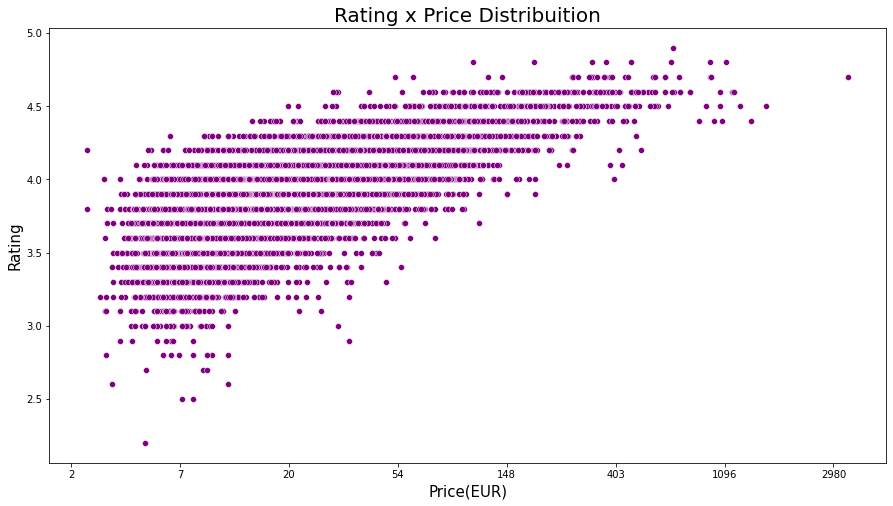

In [32]:
plt.figure(figsize=(15,8))

graph = sns.scatterplot(x=np.log(wines['Price']), y='Rating', data=wines, color='purple')
graph.set_title("Rating x Price Distribuition", fontsize=20)
graph.set_xlabel("Price(EUR)", fontsize= 15)
graph.set_ylabel("Rating", fontsize= 15)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int));

plt.show()

#### Key Takeaway:
- From the figure above we can see that there is a tendency of average rating increasing when the price increases.
- However, there are a lot of wines with 4+ rating for 7 EUR and 4.4+ rating for 20 EUR. This observation contradicts what most people usually think about good wines being expensive: good wines can be found at an affordable price.